## Project 6. RNA-seq, differential RNA expression analysis

### Loading data


Raw reads from the EBI SRA database:

In [1]:
!wget http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR941/SRR941816/SRR941816.fastq.gz

--2023-02-28 07:18:38--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR941/SRR941816/SRR941816.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433539958 (413M) [application/x-gzip]
Saving to: ‘SRR941816.fastq.gz’

SRR941816.fastq.gz  100%[===================>] 413.46M   700KB/s    in 10m 17s 

2023-02-28 07:28:58 (686 KB/s) - ‘SRR941816.fastq.gz’ saved [433539958/433539958]



In [2]:
!wget http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR941/SRR941817/SRR941817.fastq.gz

--2023-02-28 07:28:58--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR941/SRR941817/SRR941817.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477099436 (455M) [application/x-gzip]
Saving to: ‘SRR941817.fastq.gz’

SRR941817.fastq.gz  100%[===================>] 455.00M   684KB/s    in 11m 43s 

2023-02-28 07:40:53 (662 KB/s) - ‘SRR941817.fastq.gz’ saved [477099436/477099436]



In [3]:
!wget http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR941/SRR941818/SRR941818.fastq.gz

--2023-02-28 07:40:53--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR941/SRR941818/SRR941818.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83133773 (79M) [application/x-gzip]
Saving to: ‘SRR941818.fastq.gz’

SRR941818.fastq.gz  100%[===================>]  79.28M   301KB/s    in 2m 7s   

2023-02-28 07:43:02 (639 KB/s) - ‘SRR941818.fastq.gz’ saved [83133773/83133773]



In [ ]:
!wget http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR941/SRR941819/SRR941819.fastq.gz

Reference genome  and annotation:

In [5]:
!wget http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.fna.gz

--2023-02-28 07:50:03--  http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 2607:f220:41f:250::230, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.fna.gz [following]
--2023-02-28 07:50:03--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.fna.gz
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3843460 (3.7M) [application/x-gzip]
Saving to: ‘GCF_000146045.2_R64_genomic.fna.gz’

GCF_000146045.2_R64 100%[===================>]   3.67M  7.92MB/s    in 0.5s    

2023-02-28 07:50:

In [28]:
!wget http://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.gff.gz

URL transformed to HTTPS due to an HSTS policy
--2023-02-28 08:36:51--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/146/045/GCF_000146045.2_R64/GCF_000146045.2_R64_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2183228 (2.1M) [application/x-gzip]
Saving to: ‘GCF_000146045.2_R64_genomic.gff.gz.1’

GCF_000146045.2_R64 100%[===================>]   2.08M  --.-KB/s    in 0.1s    

2023-02-28 08:36:51 (19.3 MB/s) - ‘GCF_000146045.2_R64_genomic.gff.gz.1’ saved [2183228/2183228]



### Aligning with HISAT2

Installing HISAT2:

In [11]:
!wget ftp://ftp.ccb.jhu.edu/pub/infphilo/hisat2/downloads/hisat2-2.0.4-Linux_x86_64.zip

--2023-02-28 08:27:32--  ftp://ftp.ccb.jhu.edu/pub/infphilo/hisat2/downloads/hisat2-2.0.4-Linux_x86_64.zip
           => ‘hisat2-2.0.4-Linux_x86_64.zip’
Resolving ftp.ccb.jhu.edu (ftp.ccb.jhu.edu)... 128.220.174.63
Connecting to ftp.ccb.jhu.edu (ftp.ccb.jhu.edu)|128.220.174.63|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/infphilo/hisat2/downloads ... done.
==> SIZE hisat2-2.0.4-Linux_x86_64.zip ... 33458617
==> PASV ... done.    ==> RETR hisat2-2.0.4-Linux_x86_64.zip ... done.
Length: 33458617 (32M) (unauthoritative)

hisat2-2.0.4-Linux_ 100%[===================>]  31.91M  52.7MB/s    in 0.6s    

2023-02-28 08:27:33 (52.7 MB/s) - ‘hisat2-2.0.4-Linux_x86_64.zip’ saved [33458617]



In [ ]:
!unzip hisat2-2.0.4-Linux_x86_64.zip

In [22]:
!/content/hisat2-2.0.4/hisat2-build -h

HISAT2 version 2.0.4 by Daehwan Kim (infphilo@gmail.com, http://www.ccb.jhu.edu/people/infphilo)
Usage: hisat2-build [options]* <reference_in> <bt2_index_base>
    reference_in            comma-separated list of files with ref sequences
    hisat2_index_base          write ht2 data to files with this dir/basename
Options:
    -c                      reference sequences given on cmd line (as
                            <reference_in>)
    --large-index           force generated index to be 'large', even if ref
                            has fewer than 4 billion nucleotides
    -a/--noauto             disable automatic -p/--bmax/--dcv memory-fitting
    -p                      number of threads
    --bmax <int>            max bucket sz for blockwise suffix-array builder
    --bmaxdivn <int>        max bucket sz as divisor of ref len (default: 4)
    --dcv <int>             diff-cover period for blockwise (default: 1024)
    --nodc                  disable diff-cover (algorithm becomes q

Indexing the reference genome:

In [30]:
!gunzip GCF_000146045.2_R64_genomic.fna.gz

In [31]:
!/content/hisat2-2.0.4/hisat2-build /content/GCF_000146045.2_R64_genomic.fna genome_index

Settings:
  Output files: "genome_index.*.ht2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Local offset rate: 3 (one in 8)
  Local fTable chars: 6
  Local sequence length: 57344
  Local sequence overlap between two consecutive indexes: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  /content/GCF_000146045.2_R64_genomic.fna
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
  Time to read SNPs and splice sites: 00:00:00
Using parameters --bmax 2279457 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 2279457 --dcv 1024
Constructi

Running HISAT2 for our RNA-seq files:

In [32]:
!apt-get install samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cwltool fonts-glyphicons-halflings libc-ares2 libhts3 libjs-bootstrap
  libnode64 nodejs nodejs-doc python3-bs4 python3-cachecontrol
  python3-coloredlogs python3-dateutil python3-decorator python3-html5lib
  python3-humanfriendly python3-isodate python3-lockfile python3-lxml
  python3-mistune python3-msgpack python3-mypy-extensions python3-networkx
  python3-prov python3-psutil python3-pyparsing python3-rdflib
  python3-rdflib-jsonld python3-ruamel.yaml python3-schema-salad
  python3-shellescape python3-soupsieve python3-sparqlwrapper
  python3-typing-extensions python3-webencodings python3-yaml
Suggested packages:
  docker.io | singularity-container npm python3-genshi python-lockfile-doc
  python3-lxml-dbg python-lxml-doc python-networkx-doc python3-matplotlib
  python3-pygraphviz | python3-pydot python3-scipy python-prov-doc
  python3

In [33]:
!samtools


Program: samtools (Tools for alignments in the SAM format)
Version: 1.10 (using htslib 1.10.2-3ubuntu0.1)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     fqidx          index/extract FASTQ
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a file by read group
     quickcheck     quickly check if SAM/BAM/CRAM file appears intact
     fastq

In [35]:
!/content/hisat2-2.0.4/hisat2 -p 4 -x genome_index -U /content/SRR941816.fastq.gz | samtools sort > out816.bam

9043877 reads; of these:
  9043877 (100.00%) were unpaired; of these:
    515651 (5.70%) aligned 0 times
    7537646 (83.35%) aligned exactly 1 time
    990580 (10.95%) aligned >1 times
94.30% overall alignment rate
[bam_sort_core] merging from 2 files and 1 in-memory blocks...


In [36]:
!/content/hisat2-2.0.4/hisat2 -p 4 -x genome_index -U /content/SRR941817.fastq.gz | samtools sort > out817.bam

9929568 reads; of these:
  9929568 (100.00%) were unpaired; of these:
    505448 (5.09%) aligned 0 times
    8206647 (82.65%) aligned exactly 1 time
    1217473 (12.26%) aligned >1 times
94.91% overall alignment rate
[bam_sort_core] merging from 2 files and 1 in-memory blocks...


In [37]:
!/content/hisat2-2.0.4/hisat2 -p 4 -x genome_index -U /content/SRR941818.fastq.gz | samtools sort > out818.bam

1721675 reads; of these:
  1721675 (100.00%) were unpaired; of these:
    65765 (3.82%) aligned 0 times
    1433258 (83.25%) aligned exactly 1 time
    222652 (12.93%) aligned >1 times
96.18% overall alignment rate


In [38]:
!/content/hisat2-2.0.4/hisat2 -p 4 -x genome_index -U /content/SRR941819.fastq.gz | samtools sort > out819.bam

6172452 reads; of these:
  6172452 (100.00%) were unpaired; of these:
    231797 (3.76%) aligned 0 times
    5089119 (82.45%) aligned exactly 1 time
    851536 (13.80%) aligned >1 times
96.24% overall alignment rate
[bam_sort_core] merging from 1 files and 1 in-memory blocks...


### Quantifying with featureCounts

COnverting GFF annotation to the GTF file:

In [49]:
!apt-get install gffread

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgclib1
The following NEW packages will be installed:
  gffread libgclib1
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 188 kB of archives.
After this operation, 566 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libgclib1 amd64 0.11.4-1 [142 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 gffread amd64 0.11.7-2 [45.5 kB]
Fetched 188 kB in 0s (858 kB/s)
Selecting previously unselected package libgclib1:amd64.
(Reading database ... 131340 files and directories currently installed.)
Preparing to unpack .../libgclib1_0.11.4-1_amd64.deb ...
Unpacking libgclib1:amd64 (0.11.4-1) ...
Selecting previously unselected package gffread.
Preparing to unpack .../gffread_0.11.7-2_amd64.deb ...
Unpacking gffread (0.11.7-2) ...
Setting up libgclib1:amd6

In [51]:
!gffread -h

gffread v0.11.7. Usage:
gffread <input_gff> [-g <genomic_seqs_fasta> | <dir>][-s <seq_info.fsize>] 
 [-o <outfile>] [-t <trackname>] [-r [[<strand>]<chr>:]<start>..<end> [-R]]
 [-CTVNJMKQAFPGUBHZWTOLE] [-w <exons.fa>] [-x <cds.fa>] [-y <tr_cds.fa>]
 [-i <maxintron>] [--bed] [--table <attrlist>] [--sort-by <refseq_list.txt>]
 
 Filter, convert or cluster GFF/GTF/BED records, extract the sequence of
 transcripts (exon or CDS) and more.
 By default (i.e. without -O) only transcripts are processed, discarding any
 other non-transcript features. Default output is a simplified GFF3 with only
 the basic attributes.
 
 <input_gff> is a GFF file, use '-' for stdin
 
Options:
 -i   discard transcripts having an intron larger than <maxintron>
 -l   discard transcripts shorter than <minlen> bases
 -r   only show transcripts overlapping coordinate range <start>..<end>
      (on chromosome/contig <chr>, strand <strand> if provided)
 -R   for -r option, discard all transcripts that are not fully 
   

In [44]:
!gunzip /content/GCF_000146045.2_R64_genomic.gff.gz

In [52]:
!gffread /content/GCF_000146045.2_R64_genomic.gff -T -o /content/gen_ann.gtf

Running the feature counts:

In [53]:
!apt-get install subread

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  subread
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 656 kB of archives.
After this operation, 7,152 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 subread amd64 2.0.0+dfsg-1 [656 kB]
Fetched 656 kB in 1s (863 kB/s)
Selecting previously unselected package subread.
(Reading database ... 131350 files and directories currently installed.)
Preparing to unpack .../subread_2.0.0+dfsg-1_amd64.deb ...
Unpacking subread (2.0.0+dfsg-1) ...
Setting up subread (2.0.0+dfsg-1) ...
Processing triggers for man-db (2.9.1-1) ...


In [55]:
!featureCounts -h

featureCounts: invalid option -- 'h'

Version 2.0.0

Usage: featureCounts [options] -a <annotation_file> -o <output_file> input_file1 [input_file2] ... 

## Mandatory arguments:

  -a <string>         Name of an annotation file. GTF/GFF format by default. See
                      -F option for more format information. Inbuilt annotations
                      (SAF format) is available in 'annotation' directory of the
                      package. Gzipped file is also accepted.

  -o <string>         Name of output file including read counts. A separate file
                      including summary statistics of counting results is also
                      included in the output ('<string>.summary'). Both files
                      are in tab delimited format.

  input_file1 [input_file2] ...   A list of SAM or BAM format files. They can be
                      either name or location sorted. If no files provided,
                      <stdin> input is expected. Location-sorted pai

In [56]:
!featureCounts -g gene_id -a gen_ann.gtf -o feature_counts_fr4 /content/out816.bam /content/out817.bam /content/out818.bam /content/out819.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                           o out816.bam                                     ||
||                           o out817.bam                                     ||
||                           o out818.bam                                     ||
||                           o out819.bam                        

In [61]:
!cat /content/feature_counts_fr4.summary

Status	/content/out816.bam	/content/out817.bam	/content/out818.bam	/content/out819.bam
Assigned	7489924	8342650	1467116	5193970
Unassigned_Unmapped	515651	505448	65765	231797
Unassigned_Read_Type	0	0	0	0
Unassigned_Singleton	0	0	0	0
Unassigned_MappingQuality	0	0	0	0
Unassigned_Chimera	0	0	0	0
Unassigned_FragmentLength	0	0	0	0
Unassigned_Duplicate	0	0	0	0
Unassigned_MultiMapping	730431	820993	145855	671228
Unassigned_Secondary	0	0	0	0
Unassigned_NonSplit	0	0	0	0
Unassigned_NoFeatures	616447	631772	103477	383959
Unassigned_Overlapping_Length	0	0	0	0
Unassigned_Ambiguity	78567	60519	15108	33717


In [62]:
!head /content/feature_counts_fr4

# Program:featureCounts v2.0.0; Command:"featureCounts" "-g" "gene_id" "-a" "gen_ann.gtf" "-o" "feature_counts_fr4" "/content/out816.bam" "/content/out817.bam" "/content/out818.bam" "/content/out819.bam" 
Geneid	Chr	Start	End	Strand	Length	/content/out816.bam	/content/out817.bam	/content/out818.bam	/content/out819.bam
gene-YAL068C	NC_001133.9	1807	2169	-	363	13	16	2	6
gene-YAL067W-A	NC_001133.9	2480	2707	+	228	0	0	0	0
gene-YAL067C	NC_001133.9	7235	9016	-	1782	117	69	5	11
gene-YAL065C	NC_001133.9	11565	11951	-	387	11	3	2	3
gene-YAL064W-B	NC_001133.9	12046	12426	+	381	1	3	0	0
gene-YAL064C-A	NC_001133.9	13363	13743	-	381	0	0	1	0
gene-YAL064W	NC_001133.9	21566	21850	+	285	0	0	0	0
gene-YAL063C-A	NC_001133.9	22395	22685	-	291	0	0	0	0


In [63]:
!cat /content/feature_counts_fr4 | cut -f 1,7-10 > simple_counts.txt

In [64]:
!head /content/simple_counts.txt -n 30

# Program:featureCounts v2.0.0; Command:"featureCounts" "-g" "gene_id" "-a" "gen_ann.gtf" "-o" "feature_counts_fr4" "/content/out816.bam" "/content/out817.bam" "/content/out818.bam" "/content/out819.bam" 
Geneid	/content/out816.bam	/content/out817.bam	/content/out818.bam	/content/out819.bam
gene-YAL068C	13	16	2	6
gene-YAL067W-A	0	0	0	0
gene-YAL067C	117	69	5	11
gene-YAL065C	11	3	2	3
gene-YAL064W-B	1	3	0	0
gene-YAL064C-A	0	0	1	0
gene-YAL064W	0	0	0	0
gene-YAL063C-A	0	0	0	0
gene-YAL063C	14	36	2	4
gene-YAL062W	7630	1097	131	162
gene-YAL061W	1914	1945	32	82
gene-YAL060W	4102	4844	85	334
gene-YAL059W	135	256	528	1679
gene-YAL058W	85	138	55	196
gene-YAL056W	1416	1173	26	79
gene-YAL055W	227	212	12	37
gene-YAL054C	23273	6377	158	125
gene-YAL053W	1928	774	387	924
gene-YAL051W	521	474	63	198
gene-YAL049C	2665	2406	67	295
gene-YAL048C	254	226	28	86
gene-YAL047C	101	123	24	86
gene-YAL046C	38	193	27	152
gene-YAL044W-A	519	462	25	124
gene-YAL044C	805	1524	141	437
gene-YAL043C	636	686	126	543
gene-YAL0

## Finding the differentially expressed genes with Deseq2

Some tutorials:
* https://colab.research.google.com/github/pachterlab/CWGFLHGCCHAP_2021/blob/master/notebooks/CellAtlasAnalysis/deSeq2Analysis_StarvationResponse.ipynb
* https://github.com/isb-cgc/Community-Notebooks/blob/master/Notebooks/How_to_analyze_differential_expression_between_paired_tumor_and_normal_samples.ipynb

R code below (takes too much time to load packages in rpy...)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c("edgeR", "DESeq2"))
BiocManager::install("apeglm")

library(apeglm)
library(DESeq2)
library(edgeR)
library(scales)

counts <- read.table("simple_counts.txt", header = TRUE, row.names = 1, check.names = FALSE)
groups <- read.table("ann.txt", header = TRUE)
expr_group <- "fermentation_30_min"
ctrl_group <- "control_0_min"


groups$Group <- relevel(factor(groups$Group), ref = ctrl_group)
rownames(groups) <- groups$Sample
groups$Sample <- NULL

dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = groups,
                              design = ~ Group)

dds <- DESeq(dds)

res <- lfcShrink(dds, coef = paste("Group_", expr_group, "_vs_", ctrl_group, sep=""), type = "apeglm")
res <- res[order(res$padj),]

write.table(res, file = "results.tsv", sep = "\t", quote = FALSE)

## Analysing DESeq results

Loading data:

In [28]:
url = 'https://raw.githubusercontent.com/checheanya/BI_git/main/HW6/results.tsv'
df = pd.read_csv(url, sep='\t')
df.reset_index(inplace=True)

df['gene'] = df['index'].apply(lambda x: x[5:])
df.drop(columns=['index'], inplace=True)

df.head()

,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene
0,16754.601076,7.870180,0.397689,2.588790e-88,1.517807e-84,YER062C
2,8548.051857,7.840676,0.427337,1.810176e-76,3.537687e-73,YHR094C
1,10087.586366,7.835333,0.401283,3.649236e-86,1.069773e-82,YDR536W
3,2113.462978,7.736216,0.463548,8.278346e-64,1.213399e-60,YNL065W
14,593.855754,7.727296,0.558949,3.974131e-44,1.553355e-41,YOL124C


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

We can look at the distribution of the log fold changes and p-adjusted:

<Figure size 1440x576 with 0 Axes>

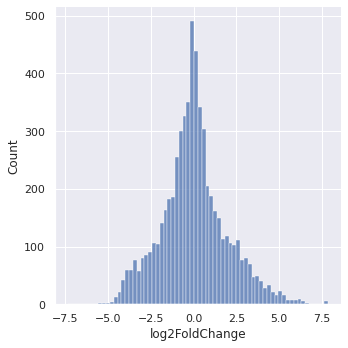

In [41]:
sns.displot(df, x='log2FoldChange');

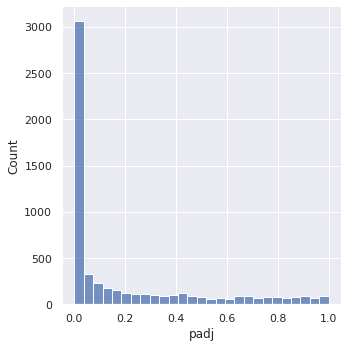

In [42]:
sns.displot(df, x='padj');

We can build volcano plot:

In [43]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=4e52584ba447691a92a2bdb652bc1b33cd7e08a7547ff7b09bfd31a8ba88bd52
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
Successfully built bioinfokit


In [44]:
from bioinfokit import analys, visuz

In [61]:
df.isna().sum()

baseMean            0
log2FoldChange    360
lfcSE             360
pvalue            360
padj              596
gene                0
dtype: int64

In [59]:
df_nn = df.dropna()

In [60]:
df_nn.isna().sum()

baseMean          0
log2FoldChange    0
lfcSE             0
pvalue            0
padj              0
gene              0
dtype: int64

In [55]:
names = list(df[(df['padj'] < 0.005) & (abs(df['log2FoldChange']) > 5.5)]['gene'])

In [62]:
visuz.GeneExpression.volcano(df=df_nn, lfc="log2FoldChange", pv="padj", geneid="gene", 
    genenames= names,
    gstyle=2, sign_line=True, xlm=(-6,6,1), ylm=(0,61,5), figtype='svg', axtickfontsize=10,
    axtickfontname='Verdana')

## Gene Ontology annotation

Selecting top-50 genes:

In [63]:
!head -n 50 result2.txt | cut -f 1 | cut -d "-" -f 2 > genes.txt

Results for top-50 genes could be found here: https://github.com/checheanya/BI_git/blob/main/HW6/GO_results_top50.txt 